In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from utils import ROOT_DIR, get_data

%load_ext autoreload
%autoreload 2

# Clean and save raw data

In [2]:
# IR = (TC / VAPOP) * 100000
raw_data = pd.read_csv(ROOT_DIR + "/data/csvs/rawdata.csv")

In [3]:
raw_data.head()

,id,LONG,LAT,TC,voronoi_pop,nbHF,VAPOP,sampling,provnames,ACCESS,PET,POP,URBAN,WACCESS
0,1,109.5792,18.29187,4.0,294324.531250,1,294324.531250,1,Hainan,-0.625080,1.346743,2.067364,1.284664,2.655904
1,2,109.7180,18.36956,2.0,73959.992188,1,73959.992188,1,Hainan,NaN,NaN,NaN,NaN,NaN
2,3,109.4197,18.39084,60.0,218175.828125,1,218175.828125,1,Hainan,-0.737850,1.160834,0.871805,0.716921,2.674515
3,4,109.9475,18.56796,6.0,322905.031250,1,322905.031250,1,Hainan,-0.523366,1.269342,1.113280,0.613657,2.634486
4,5,109.0491,18.65009,4.0,465194.500000,1,465194.500000,1,Hainan,-1.265526,1.233569,0.818068,0.533877,2.691532


In [4]:
raw_tc_non_na = raw_data.query('not TC.isna()')
raw_tc_non_na.isna().sum()

id             0
LONG           0
LAT            0
TC             0
voronoi_pop    0
nbHF           0
VAPOP          0
sampling       0
provnames      0
ACCESS         3
PET            3
POP            3
URBAN          3
WACCESS        3
dtype: int64

In [5]:
raw_tc_non_na.describe()

,id,LONG,LAT,TC,voronoi_pop,nbHF,VAPOP,sampling,ACCESS,PET,POP,URBAN,WACCESS
count,622.000000,622.000000,622.000000,622.000000,6.220000e+02,622.000000,6.220000e+02,622.0,619.000000,619.000000,619.000000,619.000000,619.000000
mean,307.369775,113.070027,32.630025,66.220257,2.282551e+06,1.025723,2.255768e+06,1.0,-1.130183,0.184605,1.413461,1.178565,-0.834449
std,176.924945,7.365631,6.739583,541.267944,2.056447e+06,0.158437,2.047562e+06,0.0,0.817551,0.550108,0.949813,1.063968,0.910873
min,1.000000,82.096900,18.291870,1.000000,1.699957e+04,1.000000,1.699957e+04,1.0,-3.487341,-1.508443,-1.531307,-0.482502,-3.676348
25%,155.250000,108.482375,27.644925,4.000000,8.043289e+05,1.000000,7.766553e+05,1.0,-1.737318,-0.173947,0.739138,0.547064,-1.288149
50%,307.500000,113.449250,31.931155,10.000000,1.629042e+06,1.000000,1.629042e+06,1.0,-1.062163,0.235193,1.303326,1.207361,-0.942243
75%,459.750000,118.011500,36.821695,32.000000,3.044448e+06,1.000000,3.035009e+06,1.0,-0.534990,0.570786,1.995453,1.835421,-0.520428
max,614.000000,132.546400,49.717850,13243.000000,1.390106e+07,2.000000,1.390106e+07,1.0,1.015821,2.789949,4.630500,4.335167,2.691532


In [6]:
raw_tc_na = raw_data.query('TC.isna()')
raw_tc_na.isna().sum()

id                0
LONG              0
LAT               0
TC             1699
voronoi_pop       0
nbHF              0
VAPOP             0
sampling          0
provnames         0
ACCESS            0
PET               0
POP               5
URBAN             0
WACCESS           0
dtype: int64

In [7]:
raw_tc_na.describe()

,id,LONG,LAT,TC,voronoi_pop,nbHF,VAPOP,sampling,ACCESS,PET,POP,URBAN,WACCESS
count,1699.000000,1699.000000,1699.000000,0.0,1.699000e+03,1699.000000,1.699000e+03,1699.0,1699.000000,1699.000000,1694.000000,1699.000000,1699.000000
mean,388.479694,100.891860,37.720877,NaN,2.133903e+06,1.000589,2.131977e+06,0.0,0.313555,-0.052204,-0.358949,-0.171903,0.313385
std,153.811064,14.654451,6.927460,NaN,2.224545e+06,0.024261,2.222139e+06,0.0,0.910335,1.117432,0.838543,0.599131,0.847265
min,22.000000,77.645833,21.395833,NaN,1.699957e+04,1.000000,1.699957e+04,0.0,-2.584068,-3.256338,-1.974678,-0.482502,-3.025917
25%,329.000000,88.270833,32.645833,NaN,6.306898e+05,1.000000,6.306898e+05,0.0,-0.284406,-0.875462,-0.920098,-0.482502,-0.204242
50%,393.000000,98.895833,38.270833,NaN,1.637106e+06,1.000000,1.637106e+06,0.0,0.311229,-0.168122,-0.338573,-0.482502,0.312922
75%,483.500000,112.645833,42.645833,NaN,2.278123e+06,1.000000,2.278123e+06,0.0,0.928701,0.835339,0.176954,-0.482502,0.867984
max,614.000000,134.520833,52.645833,NaN,1.390106e+07,2.000000,1.390106e+07,0.0,3.444752,3.466190,2.510498,2.450761,3.672449


<AxesSubplot:ylabel='Frequency'>

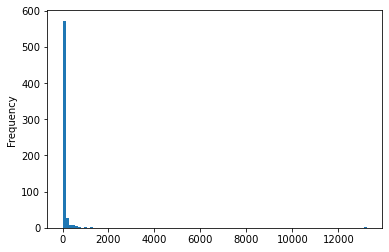

In [8]:
raw_tc_non_na["TC"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

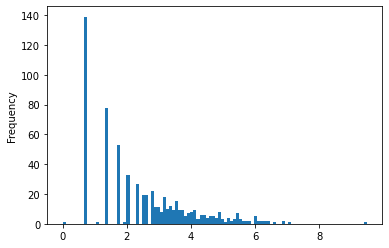

In [9]:
np.log(raw_tc_non_na["TC"]).plot.hist(bins=100)

In [10]:
raw_data.query("ACCESS >= ACCESS.quantile(0.95)").describe()

,id,LONG,LAT,TC,voronoi_pop,nbHF,VAPOP,sampling,ACCESS,PET,POP,URBAN,WACCESS
count,116.000000,116.000000,116.000000,0.0,1.160000e+02,116.0,1.160000e+02,116.0,116.000000,116.000000,116.000000,116.000000,116.000000
mean,488.000000,86.595187,34.558549,NaN,5.672673e+05,1.0,5.672673e+05,0.0,2.084007,-0.771653,-1.525421,-0.473654,1.164811
std,75.437161,3.415915,1.624140,NaN,8.879940e+05,0.0,8.879940e+05,0.0,0.367594,0.582523,0.407935,0.095290,0.433135
min,181.000000,78.270833,29.520833,NaN,1.039871e+05,1.0,1.039871e+05,0.0,1.652304,-2.363020,-1.974678,-0.482502,0.169923
25%,481.000000,84.364583,33.270833,NaN,1.039871e+05,1.0,1.039871e+05,0.0,1.819137,-1.159394,-1.974678,-0.482502,0.790319
50%,481.000000,86.395833,34.520833,NaN,5.158962e+05,1.0,5.158962e+05,0.0,1.962916,-0.667736,-1.505685,-0.482502,1.147461
75%,559.000000,88.895833,35.770833,NaN,5.158962e+05,1.0,5.158962e+05,0.0,2.262050,-0.367431,-1.305703,-0.482502,1.457051
max,559.000000,101.395833,37.645833,NaN,8.842163e+06,1.0,8.842163e+06,0.0,3.444752,0.387251,-0.099741,0.543802,2.391888


In [11]:
raw_data.query("POP <= POP.quantile(0.05)").describe()

,id,LONG,LAT,TC,voronoi_pop,nbHF,VAPOP,sampling,ACCESS,PET,POP,URBAN,WACCESS
count,116.000000,116.000000,116.000000,0.0,1.160000e+02,116.0,1.160000e+02,116.0,116.000000,116.000000,1.160000e+02,116.000000,116.000000
mean,455.637931,91.805316,38.319325,NaN,1.010822e+06,1.0,1.010822e+06,0.0,1.212095,0.313605,-1.974678e+00,-0.448281,0.669802
std,90.088401,5.639838,2.544643,NaN,8.760660e+05,0.0,8.760660e+05,0.0,0.639987,1.397401,8.920317e-16,0.183107,0.506022
min,349.000000,80.770833,33.270833,NaN,1.039871e+05,1.0,1.039871e+05,0.0,-0.414080,-2.363020,-1.974678e+00,-0.482502,-0.267109
25%,352.000000,88.895833,36.395833,NaN,1.039871e+05,1.0,1.039871e+05,0.0,0.653575,-0.997434,-1.974678e+00,-0.482502,0.375073
50%,481.000000,91.083333,38.270833,NaN,5.158962e+05,1.0,5.158962e+05,0.0,1.308815,0.214757,-1.974678e+00,-0.482502,0.588537
75%,559.000000,95.770833,40.145833,NaN,1.885811e+06,1.0,1.885811e+06,0.0,1.766923,1.625414,-1.974678e+00,-0.482502,0.791633
max,603.000000,104.520833,45.770833,NaN,3.051850e+06,1.0,3.051850e+06,0.0,2.424813,2.747000,-1.974678e+00,0.681398,2.028019


In [12]:
# replace TC NaN values with 0 values, when ACCESS is higher than 95 Percentile of ACCESS values
raw_data_with_zeros = raw_data.copy()
raw_data_with_zeros["TC"] = np.where(raw_data_with_zeros["ACCESS"] >= raw_data_with_zeros["ACCESS"].quantile(0.95), 0, raw_data_with_zeros["TC"])
raw_data_with_zeros["TC"] = np.where(raw_data_with_zeros["POP"] <= raw_data_with_zeros["POP"].quantile(0.05), 0, raw_data_with_zeros["TC"])

# number of zero values
print("Number of TC = 0:", len(raw_data_with_zeros.query("TC == 0")))


Number of TC = 0: 193


In [13]:
raw_data_with_zeros.query("TC == 0").head()

,id,LONG,LAT,TC,voronoi_pop,nbHF,VAPOP,sampling,provnames,ACCESS,PET,POP,URBAN,WACCESS
354,181,90.145833,30.145833,0.0,2110784.00,1,2110784.00,0,Xizang,1.692769,-2.092401,-0.346779,-0.482502,0.825996
372,181,91.395833,33.270833,0.0,2110784.00,1,2110784.00,0,Qinghai,1.821902,-1.819417,-1.611045,-0.482502,0.614882
393,181,92.645833,32.645833,0.0,2110784.00,1,2110784.00,0,Xizang,1.749758,-1.581937,-0.421769,-0.482502,0.576491
400,181,93.270833,29.520833,0.0,2110784.00,1,2110784.00,0,Xizang,1.727767,-1.793981,-0.615617,-0.482502,1.085963
499,210,101.395833,31.395833,0.0,1809830.75,1,1809830.75,0,Sichuan,1.708953,-1.788534,-0.099741,-0.482502,0.220027


In [14]:
raw_data_with_zeros.query("TC >= 0").isna().sum()

id             0
LONG           0
LAT            0
TC             0
voronoi_pop    0
nbHF           0
VAPOP          0
sampling       0
provnames      0
ACCESS         3
PET            3
POP            3
URBAN          3
WACCESS        3
dtype: int64

In [15]:
raw_data_with_zeros.describe()

,id,LONG,LAT,TC,voronoi_pop,nbHF,VAPOP,sampling,ACCESS,PET,POP,URBAN,WACCESS
count,2321.000000,2321.000000,2321.000000,815.000000,2.321000e+03,2321.000000,2.321000e+03,2321.000000,2318.000000,2318.000000,2313.000000,2318.000000,2318.000000
mean,366.743214,104.155462,36.356590,50.538650,2.173739e+06,1.007324,2.165151e+06,0.267988,-0.071982,0.011034,0.115379,0.188727,0.006867
std,164.271174,14.170567,7.236574,473.604108,2.181325e+06,0.085287,2.176985e+06,0.443007,1.092585,1.003377,1.171334,0.960270,1.002680
min,1.000000,77.645833,18.291870,0.000000,1.699957e+04,1.000000,1.699957e+04,0.000000,-3.487341,-3.256338,-1.974678,-0.482502,-3.676348
25%,225.000000,91.395833,30.968950,2.000000,6.697265e+05,1.000000,6.697265e+05,0.000000,-0.808616,-0.679072,-0.701768,-0.482502,-0.703669
50%,390.000000,105.145833,36.395833,4.000000,1.637106e+06,1.000000,1.637106e+06,0.000000,-0.022139,0.011067,0.000539,-0.482502,0.003702
75%,481.000000,116.228500,41.970320,22.000000,2.557830e+06,1.000000,2.552764e+06,1.000000,0.686418,0.697745,0.809188,0.807235,0.677896
max,614.000000,134.520833,52.645833,13243.000000,1.390106e+07,2.000000,1.390106e+07,1.000000,3.444752,3.466190,4.630500,4.335167,3.672449


In [16]:
raw_data_with_zeros_without_na = raw_data_with_zeros.dropna()

In [17]:
raw_data_with_zeros_without_na.describe()

,id,LONG,LAT,TC,voronoi_pop,nbHF,VAPOP,sampling,ACCESS,PET,POP,URBAN,WACCESS
count,812.000000,812.000000,812.000000,812.000000,8.120000e+02,812.000000,8.120000e+02,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,343.961823,107.498655,33.592855,50.710591,1.949372e+06,1.019704,1.928856e+06,0.762315,-0.481589,0.118251,0.672332,0.788644,-0.429321
std,172.787054,12.152613,6.278269,474.470778,1.949150e+06,0.139068,1.938481e+06,0.425927,1.409672,0.781895,1.576832,1.164337,1.106955
min,1.000000,78.270833,18.291870,0.000000,1.699957e+04,1.000000,1.699957e+04,0.000000,-3.487341,-2.363020,-1.974678,-0.482502,-3.676348
25%,199.750000,101.395833,29.521206,2.000000,5.158962e+05,1.000000,5.158962e+05,1.000000,-1.493258,-0.399133,-0.216299,-0.482502,-1.127073
50%,365.500000,109.904050,34.279290,4.000000,1.368634e+06,1.000000,1.368634e+06,1.000000,-0.734903,0.173306,0.907536,0.798634,-0.720350
75%,481.000000,116.805175,37.645833,22.000000,2.589056e+06,1.000000,2.580963e+06,1.000000,0.301102,0.575787,1.758941,1.581750,0.308398
max,614.000000,132.546400,49.717850,13243.000000,1.390106e+07,2.000000,1.390106e+07,1.000000,3.444752,2.789949,4.630500,4.335167,2.691532


In [18]:
raw_data_with_IR = raw_data_with_zeros_without_na.copy()

In [19]:
raw_data_with_IR["IR"] = (raw_data_with_IR["TC"] / raw_data_with_IR["VAPOP"]) * 100000
raw_data_with_IR.head()


,id,LONG,LAT,TC,voronoi_pop,nbHF,VAPOP,sampling,provnames,ACCESS,PET,POP,URBAN,WACCESS,IR
0,1,109.5792,18.29187,4.0,294324.531250,1,294324.531250,1,Hainan,-0.625080,1.346743,2.067364,1.284664,2.655904,1.359044
2,3,109.4197,18.39084,60.0,218175.828125,1,218175.828125,1,Hainan,-0.737850,1.160834,0.871805,0.716921,2.674515,27.500755
3,4,109.9475,18.56796,6.0,322905.031250,1,322905.031250,1,Hainan,-0.523366,1.269342,1.113280,0.613657,2.634486,1.858131
4,5,109.0491,18.65009,4.0,465194.500000,1,465194.500000,1,Hainan,-1.265526,1.233569,0.818068,0.533877,2.691532,0.859855
5,6,110.2876,18.83795,26.0,498789.250000,1,498789.250000,1,Hainan,0.042701,0.980076,0.756649,-0.482502,2.614768,5.212622


In [20]:
raw_data_with_IR[
    ['id', 'LONG', 'LAT', 'voronoi_pop', 'nbHF', 'sampling', 'provnames', 'ACCESS', 'PET', 'POP', 'URBAN', 'WACCESS', 'VAPOP', 'TC', 'IR']
].to_csv(ROOT_DIR + "/data/csvs/data-all-columns.csv", index=True, index_label="index", na_rep="NaN")


In [21]:
raw_data_with_IR.columns

Index(['id', 'LONG', 'LAT', 'TC', 'voronoi_pop', 'nbHF', 'VAPOP', 'sampling',
       'provnames', 'ACCESS', 'PET', 'POP', 'URBAN', 'WACCESS', 'IR'],
      dtype='object')

In [22]:
data = raw_data_with_IR.drop(["id", "voronoi_pop", "VAPOP", "nbHF", "TC", "sampling", "provnames"], axis=1)
data.head()


,LONG,LAT,ACCESS,PET,POP,URBAN,WACCESS,IR
0,109.5792,18.29187,-0.625080,1.346743,2.067364,1.284664,2.655904,1.359044
2,109.4197,18.39084,-0.737850,1.160834,0.871805,0.716921,2.674515,27.500755
3,109.9475,18.56796,-0.523366,1.269342,1.113280,0.613657,2.634486,1.858131
4,109.0491,18.65009,-1.265526,1.233569,0.818068,0.533877,2.691532,0.859855
5,110.2876,18.83795,0.042701,0.980076,0.756649,-0.482502,2.614768,5.212622


In [23]:
data.to_csv(ROOT_DIR + "/data/csvs/data.csv", index=True, index_label="index", na_rep="NaN")

# Split cleaned data into train/validation/test sets

In [24]:
def train_val_test_split(X, Y):
    random_state = 201
    # check data has been read in properly
    _X_train, X_test, _Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=random_state)

    X_train, X_val, Y_train, Y_val = train_test_split(
        _X_train, _Y_train, test_size=0.25, random_state=random_state)  # 0.25 x 0.8 = 0.2
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [25]:
# load cleaned data
data_to_split = pd.read_csv(ROOT_DIR + "/data/csvs/data.csv", index_col="index")
print("Number of all rows:", len(data))
data.head()

Number of all rows: 812


,LONG,LAT,ACCESS,PET,POP,URBAN,WACCESS,IR
0,109.5792,18.29187,-0.625080,1.346743,2.067364,1.284664,2.655904,1.359044
2,109.4197,18.39084,-0.737850,1.160834,0.871805,0.716921,2.674515,27.500755
3,109.9475,18.56796,-0.523366,1.269342,1.113280,0.613657,2.634486,1.858131
4,109.0491,18.65009,-1.265526,1.233569,0.818068,0.533877,2.691532,0.859855
5,110.2876,18.83795,0.042701,0.980076,0.756649,-0.482502,2.614768,5.212622


In [26]:
# create a dataframe with all training data except the target column
X = data_to_split.drop(columns=["IR"])

# create a dataframe with only the target column
Y = data_to_split[["IR"]]

X_train, X_val, X_test, Y_train, Y_val, Y_test = train_val_test_split(X, Y)
X_train.head()

,LONG,LAT,ACCESS,PET,POP,URBAN,WACCESS
index,,,,,,,
1858,112.7377,36.33671,-0.532387,0.572101,0.581231,-0.482502,-1.152263
1548,119.3016,27.09157,-1.034481,-0.267429,1.473187,1.728464,-1.126146
1359,124.4795,44.80382,-0.448610,0.027947,0.280490,0.579864,-0.152102
183,119.5500,26.30194,-0.406788,0.222093,1.316751,1.296449,-1.053020
714,114.3525,35.87894,-2.306559,0.724398,2.160135,2.277783,-1.398548


In [27]:
# Save splitted data in csv files
pd.concat([X_train, Y_train], axis=1).to_csv(ROOT_DIR + "/data/csvs/split/train.csv", index=True, index_label="index")
pd.concat([X_val, Y_val], axis=1).to_csv(ROOT_DIR + "/data/csvs/split/validation.csv", index=True, index_label="index")
pd.concat([X_test, Y_test], axis=1).to_csv(ROOT_DIR + "/data/csvs/split/test.csv", index=True, index_label="index")


In [28]:
import seaborn as sns
def plot_distributions():
    _, Y_train, _, Y_validation, _, Y_test = get_data()
    sns.displot(Y_train["IR"], color="dodgerblue", kde=True, legend=False, stat="density", aspect=3)
    sns.displot(Y_validation["IR"], color="dodgerblue", kde=True, legend=False, stat="density", aspect=3)
    sns.displot(Y_test["IR"], color="dodgerblue", kde=True, legend=False, stat="density", aspect=3)

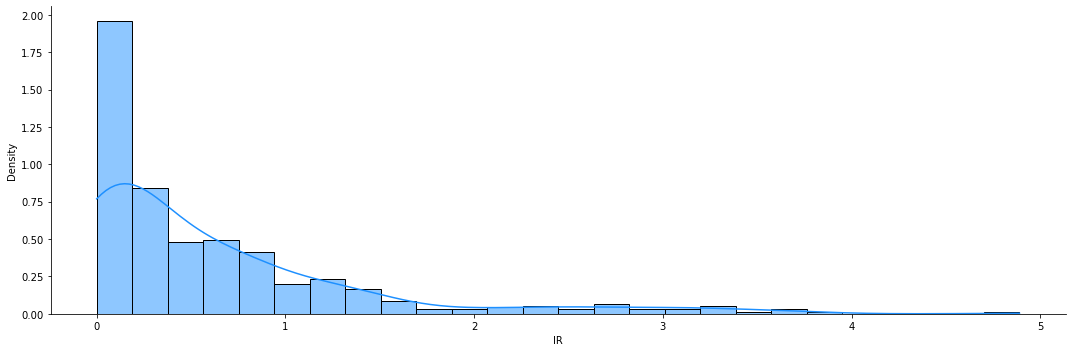

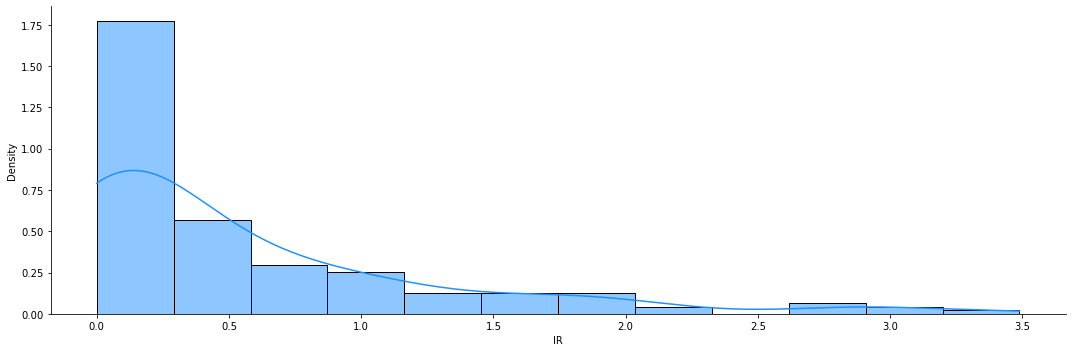

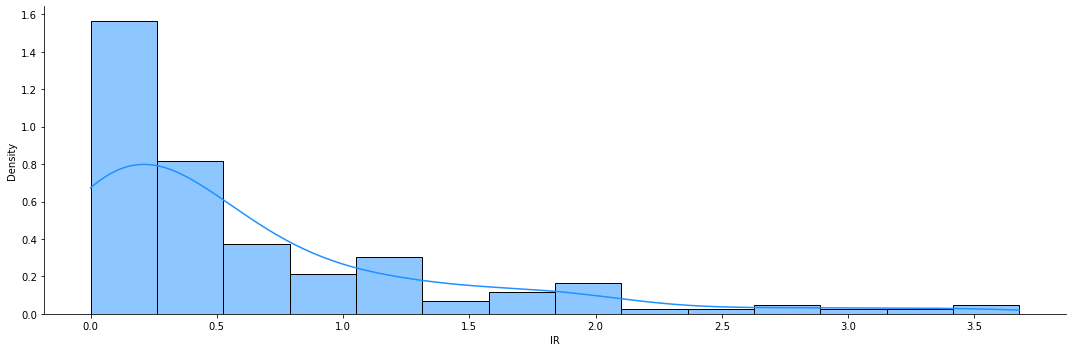

In [29]:
plot_distributions()

# Normalized Summary

In [30]:
normalized_data = data_to_split.copy()
normalized_data["LONG"] = normalized_data["LONG"] / 180
normalized_data["LAT"] = normalized_data["LAT"] / 90
normalized_data["LIR"] = np.log(normalized_data["IR"] + 1)
normalized_data.pop("IR")
normalized_data = normalized_data[["LONG", "LAT", "ACCESS", "PET", "POP", "URBAN", "WACCESS", "LIR"]]

In [31]:
print(normalized_data
      .rename(columns={
          "LONG": "(1)", 
          "LAT": "(2)",
          "ACCESS": "(3)",
          "PET": "(4)",
          "POP": "(5)",
          "URBAN": "(6)",
          "WACCESS": "(7)",
          "LIR": "(8)"
      })
      .describe()
      .round(4)
      .to_latex(caption="Summary statistics of the cleaned data: (1) LONG, (2) LAT, (3) ACCESS, (4) PET, (5) POP, (6) URBAN, (7) WACCESS, (8) LIR",
                label="tab:summary-statistics-of-the-cleaned-data"))


\begin{table}
\centering
\caption{Summary statistics of the cleaned data: (1) LONG, (2) LAT, (3) ACCESS, (4) PET, (5) POP, (6) URBAN, (7) WACCESS, (8) LIR}
\label{tab:summary-statistics-of-the-cleaned-data}
\begin{tabular}{lrrrrrrrr}
\toprule
{} &       (1) &       (2) &       (3) &       (4) &       (5) &       (6) &       (7) &       (8) \\
\midrule
count &  812.0000 &  812.0000 &  812.0000 &  812.0000 &  812.0000 &  812.0000 &  812.0000 &  812.0000 \\
mean  &    0.5972 &    0.3733 &   -0.4816 &    0.1183 &    0.6723 &    0.7886 &   -0.4293 &    0.6104 \\
std   &    0.0675 &    0.0698 &    1.4097 &    0.7819 &    1.5768 &    1.1643 &    1.1070 &    0.7730 \\
min   &    0.4348 &    0.2032 &   -3.4873 &   -2.3630 &   -1.9747 &   -0.4825 &   -3.6763 &    0.0000 \\
25\%   &    0.5633 &    0.3280 &   -1.4933 &   -0.3991 &   -0.2163 &   -0.4825 &   -1.1271 &    0.0639 \\
50\%   &    0.6106 &    0.3809 &   -0.7349 &    0.1733 &    0.9075 &    0.7986 &   -0.7204 &    0.3355 \\
75\%   &    0.